### Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn import datasets
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.dummy import DummyRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.impute import SimpleImputer
from sklearn.linear_model import Ridge

from sklearn.model_selection import (
    cross_val_score,
    cross_validate,
    train_test_split,
)

from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.tree import DecisionTreeRegressor, export_graphviz

# import seaborn as sns

%matplotlib inline
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")

### Reading data into a DataFrame

In [3]:
data = pd.read_csv("./InternAssignmentData4.csv")

/opt/miniconda3/envs/571/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3457: DtypeWarning: Columns (107) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


### Data Cleaning

In [4]:
data.head()

,respnum,intdate,gendr,q1,q2a,q2b,q3a,q3b,q3c,q3d,...,q28m,q30a,q31,q32,q33,q34,q35,q37,wt,filter_$
0,21000001,20021001,1,14,10,,4.0,6.0,0.0,0.0,...,,5,5,2,4,4,1,1,1.052245,1
1,21000014,20021001,2,2,4,,0.0,4.0,0.0,0.0,...,5,5,5,1,3,4,3,5,0.557944,1
2,21000016,20021001,1,9,0,2,0.0,0.0,0.0,0.0,...,1,4,5,1,5,6,5,3,0.397586,0
3,21000041,20021001,2,15,8,,8.0,0.0,0.0,0.0,...,,95,4,4,3,2,5,9,1.115113,1
4,21000046,20021001,1,9,5,,5.0,0.0,0.0,0.0,...,6,5,6,5,3,1,5,98,0.572113,0


##### Dropping columns that appear to be unconnected and columns with no questions in the dictionary.

In [5]:
data = data.drop(['respnum','intdate','q2a',
 'q2b',
 'q3a',
 'q3b',
 'q3c',
 'q3d',
 'q3e',
 'q3f',
 'q3g',
 'q4a',
 'q4b',
 'q4c',
 'q4d',
 'q4e',
 'q5a',
 'q5b',
 'q5c',
 'q5d',
 'q5e',
 'q5f','q28','wt',
 'filter_$'], axis = 1)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10113 entries, 0 to 10112
Data columns (total 99 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   gendr   10113 non-null  int64 
 1   q1      10113 non-null  int64 
 2   q6      10113 non-null  int64 
 3   q6a     10113 non-null  int64 
 4   q8a     10113 non-null  object
 5   q8b     10113 non-null  object
 6   q91     10113 non-null  object
 7   q92     10113 non-null  object
 8   q93     10113 non-null  object
 9   q94     10113 non-null  object
 10  q98     10113 non-null  object
 11  q99     10113 non-null  object
 12  q910    10113 non-null  object
 13  q911    10113 non-null  object
 14  q911a   10113 non-null  object
 15  q912    10113 non-null  object
 16  q10     10113 non-null  object
 17  q11a    10113 non-null  object
 18  q11b    10113 non-null  object
 19  q12     10113 non-null  object
 20  q131    10113 non-null  object
 21  q132    10113 non-null  object
 22  q133    10113 non-null

##### To deal with NAN values, transforming object types to float types.

In [7]:
for column in data.select_dtypes(include=['object']):
    data[column] = pd.to_numeric(data[column], errors='coerce')

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10113 entries, 0 to 10112
Data columns (total 99 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   gendr   10113 non-null  int64  
 1   q1      10113 non-null  int64  
 2   q6      10113 non-null  int64  
 3   q6a     10113 non-null  int64  
 4   q8a     922 non-null    float64
 5   q8b     922 non-null    float64
 6   q91     618 non-null    float64
 7   q92     922 non-null    float64
 8   q93     922 non-null    float64
 9   q94     922 non-null    float64
 10  q98     922 non-null    float64
 11  q99     922 non-null    float64
 12  q910    922 non-null    float64
 13  q911    922 non-null    float64
 14  q911a   78 non-null     float64
 15  q912    548 non-null    float64
 16  q10     4457 non-null   float64
 17  q11a    4457 non-null   float64
 18  q11b    4457 non-null   float64
 19  q12     4457 non-null   float64
 20  q131    2462 non-null   float64
 21  q132    4457 non-null   float64
 22

In [9]:
data.describe(include ='all')

,gendr,q1,q6,q6a,q8a,q8b,q91,q92,q93,q94,...,q26,q28y,q28m,q30a,q31,q32,q33,q34,q35,q37
count,10113.000000,10113.000000,10113.000000,10113.000000,922.000000,922.000000,618.000000,922.000000,922.000000,922.000000,...,10113.000000,6981.000000,1541.000000,10113.000000,10113.000000,5263.000000,10113.000000,10113.000000,10113.000000,10113.000000
mean,1.609216,11.031346,7.911302,8.223079,2.906725,8.791757,21.448220,9.436009,9.632321,8.524946,...,2.836547,10.782553,5.301103,5.813507,4.912093,3.612008,3.900722,3.521507,4.833284,31.848808
std,0.487950,5.507359,6.941205,10.711020,1.382369,4.378411,31.283066,8.831560,11.758258,6.812832,...,6.502470,11.438711,4.077997,11.872394,8.697451,8.985204,9.025294,9.787444,11.781515,42.151688
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,8.000000,7.000000,6.000000,2.000000,8.000000,8.000000,8.000000,7.000000,7.000000,...,2.000000,3.000000,3.000000,4.000000,4.000000,2.000000,1.000000,1.000000,2.000000,3.000000
50%,2.000000,13.000000,8.000000,7.000000,3.000000,9.000000,9.000000,9.000000,8.000000,8.000000,...,3.000000,6.000000,6.000000,5.000000,4.000000,2.000000,3.000000,2.000000,3.000000,7.000000
75%,2.000000,15.000000,9.000000,9.000000,4.000000,10.000000,10.000000,10.000000,10.000000,10.000000,...,3.000000,15.000000,6.000000,5.000000,5.000000,4.000000,4.000000,3.000000,5.000000,97.000000
max,2.000000,95.000000,98.000000,98.000000,5.000000,98.000000,98.000000,98.000000,98.000000,98.000000,...,98.000000,96.000000,66.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000


##### Number of Nan values

In [10]:
data.isna().sum().sum()

545270

##### Filling the nan values with value that is bigger than the dataset's maximum value, i.e. 995

In [11]:
data = data.fillna(1001)

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10113 entries, 0 to 10112
Data columns (total 99 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   gendr   10113 non-null  int64  
 1   q1      10113 non-null  int64  
 2   q6      10113 non-null  int64  
 3   q6a     10113 non-null  int64  
 4   q8a     10113 non-null  float64
 5   q8b     10113 non-null  float64
 6   q91     10113 non-null  float64
 7   q92     10113 non-null  float64
 8   q93     10113 non-null  float64
 9   q94     10113 non-null  float64
 10  q98     10113 non-null  float64
 11  q99     10113 non-null  float64
 12  q910    10113 non-null  float64
 13  q911    10113 non-null  float64
 14  q911a   10113 non-null  float64
 15  q912    10113 non-null  float64
 16  q10     10113 non-null  float64
 17  q11a    10113 non-null  float64
 18  q11b    10113 non-null  float64
 19  q12     10113 non-null  float64
 20  q131    10113 non-null  float64
 21  q132    10113 non-null  float64
 22

In [13]:
data.describe(include ='all')

,gendr,q1,q6,q6a,q8a,q8b,q91,q92,q93,q94,...,q26,q28y,q28m,q30a,q31,q32,q33,q34,q35,q37
count,10113.000000,10113.000000,10113.000000,10113.000000,10113.000000,10113.000000,10113.000000,10113.000000,10113.000000,10113.000000,...,10113.000000,10113.000000,10113.000000,10113.000000,10113.000000,10113.000000,10113.000000,10113.000000,10113.000000,10113.000000
mean,1.609216,11.031346,7.911302,8.223079,910.004054,910.540591,941.140117,910.599328,910.617225,910.516266,...,2.836547,317.453278,849.277267,5.813507,4.912093,481.940077,3.900722,3.521507,4.833284,31.848808
std,0.487950,5.507359,6.941205,10.711020,287.316056,285.624717,234.771818,285.448647,285.401754,285.705865,...,6.502470,457.968140,357.862496,11.872394,8.697451,498.344755,9.025294,9.787444,11.781515,42.151688
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,8.000000,7.000000,6.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,...,2.000000,4.000000,1001.000000,4.000000,4.000000,2.000000,1.000000,1.000000,2.000000,3.000000
50%,2.000000,13.000000,8.000000,7.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,...,3.000000,13.000000,1001.000000,5.000000,4.000000,6.000000,3.000000,2.000000,3.000000,7.000000
75%,2.000000,15.000000,9.000000,9.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,...,3.000000,1001.000000,1001.000000,5.000000,5.000000,1001.000000,4.000000,3.000000,5.000000,97.000000
max,2.000000,95.000000,98.000000,98.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,...,98.000000,1001.000000,1001.000000,98.000000,98.000000,1001.000000,98.000000,98.000000,98.000000,98.000000


##### Number of NaN values after transforming

In [14]:
data.isna().sum().sum()

0

##### Substituting 1000 for the Don't Know, Refused, and Other values, i.e. larger than 995.
##### Then, for any numbers bigger than 995, set them to zero.

In [15]:
data.where(data != 95  , 1000, inplace=True)
data.where(data != 98  , 1000, inplace=True)
data.where(data != 97  , 1000, inplace=True)
data.where(data <= 995  , 0, inplace=True)

In [16]:
data.head()

,gendr,q1,q6,q6a,q8a,q8b,q91,q92,q93,q94,...,q26,q28y,q28m,q30a,q31,q32,q33,q34,q35,q37
0,1,14,10,10,0.0,0.0,0.0,0.0,0.0,0.0,...,3,10.0,0.0,5,5,2.0,4,4,1,1
1,2,2,10,10,0.0,0.0,0.0,0.0,0.0,0.0,...,3,0.0,5.0,5,5,1.0,3,4,3,5
2,1,9,9,5,2.0,10.0,10.0,10.0,10.0,10.0,...,1,0.0,1.0,4,5,1.0,5,6,5,3
3,2,15,8,8,0.0,0.0,0.0,0.0,0.0,0.0,...,3,10.0,0.0,0,4,4.0,3,2,5,9
4,1,9,8,9,0.0,0.0,0.0,0.0,0.0,0.0,...,1,0.0,6.0,5,6,5.0,3,1,5,0


##### Investigated the dataset and identified the ordinal (or columns with an ordered scale), category, binary,numerical and target columns.

In [17]:
binary_columns= ['gendr']
categorical_columns = ['q1', 'q8a', 'q911a', 'q10', 'q11a', 'q11b', 'q13a0', 'q13a2', 'q14', 'q16a', 'q16b', 'q16c', 'q2016', 'q2216', 'q23aa',
                      'q23e', 'q23f', 'q23h', 'q25b', 'q26', 'q33', 'q34', 'q35', 'q37' ]
numerical_columns= ['q15','q24','q32']
target_columns = ['q28y', 'q28m', 'q30a', 'q31']
ordinal_columns= list(set(data.columns)- set(binary_columns)-set(categorical_columns)-set(numerical_columns)-set(target_columns))

### In ordinal columns, replaced any values equal to zero with a neutral value.

In [18]:
for i in ordinal_columns:
    data[i] = data[i].map( lambda x : round((data[i].max()-data[i].min())/2) if x == 0 else x)

In [19]:
data

,gendr,q1,q6,q6a,q8a,q8b,q91,q92,q93,q94,...,q26,q28y,q28m,q30a,q31,q32,q33,q34,q35,q37
0,1,14,10,10,0.0,5.0,5.0,5.0,5.0,5.0,...,3,10.0,0.0,5,5,2.0,4,4,1,1
1,2,2,10,10,0.0,5.0,5.0,5.0,5.0,5.0,...,3,0.0,5.0,5,5,1.0,3,4,3,5
2,1,9,9,5,2.0,10.0,10.0,10.0,10.0,10.0,...,1,0.0,1.0,4,5,1.0,5,6,5,3
3,2,15,8,8,0.0,5.0,5.0,5.0,5.0,5.0,...,3,10.0,0.0,0,4,4.0,3,2,5,9
4,1,9,8,9,0.0,5.0,5.0,5.0,5.0,5.0,...,1,0.0,6.0,5,6,5.0,3,1,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10108,2,14,7,4,0.0,5.0,5.0,5.0,5.0,5.0,...,2,2.0,0.0,4,5,0.0,2,1,4,4
10109,1,1,8,7,0.0,5.0,5.0,5.0,5.0,5.0,...,3,10.0,0.0,4,4,0.0,3,2,5,0
10110,2,12,9,9,0.0,5.0,5.0,5.0,5.0,5.0,...,3,15.0,0.0,5,5,0.0,6,1,2,5
10111,2,12,8,5,0.0,5.0,5.0,5.0,5.0,5.0,...,3,9.0,0.0,5,3,0.0,1,3,2,0


#### Creating the target feature

- The number of years were converted to months and added to the number of months to create a loyalty statistic based on how long the consumer has been taking transportation on a regular basis. 
- As a weight, added the value for the question: "How likely are you to continue to take transport as frequently as you do today in the near future?" to the value above.  
- As a weight, added the value for the question "How likely would you be to suggest Greater Vancouver's transit service to a friend?" to the value above. 
- To get a normal distribution, converted the value to log scale.

In [20]:
data['Target']= np.log((data['q28y']*12)+data['q28m']+data['q30a']+data['q31'])

/opt/miniconda3/envs/571/lib/python3.9/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


##### Getting rid of the unrealistic target values, such as those below zero.

In [21]:
data = data[data['Target'] > 0]

In [22]:
data['Target'].max()

7.057897937411856

In [23]:
data['Target'].min()

0.6931471805599453

In [24]:
data = data.drop(['q28y','q28m','q30a','q31' ],axis = 1)

In [25]:
data

,gendr,q1,q6,q6a,q8a,q8b,q91,q92,q93,q94,...,q23h,q24,q25b,q26,q32,q33,q34,q35,q37,Target
0,1,14,10,10,0.0,5.0,5.0,5.0,5.0,5.0,...,0,3,1,3,2.0,4,4,1,1,4.867534
1,2,2,10,10,0.0,5.0,5.0,5.0,5.0,5.0,...,1,2,1,3,1.0,3,4,3,5,2.708050
2,1,9,9,5,2.0,10.0,10.0,10.0,10.0,10.0,...,1,1,2,1,1.0,5,6,5,3,2.302585
3,2,15,8,8,0.0,5.0,5.0,5.0,5.0,5.0,...,0,1,1,3,4.0,3,2,5,9,4.820282
4,1,9,8,9,0.0,5.0,5.0,5.0,5.0,5.0,...,2,2,1,1,5.0,3,1,5,0,2.833213
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10108,2,14,7,4,0.0,5.0,5.0,5.0,5.0,5.0,...,1,1,1,2,0.0,2,1,4,4,3.496508
10109,1,1,8,7,0.0,5.0,5.0,5.0,5.0,5.0,...,8,1,1,3,0.0,3,2,5,0,4.852030
10110,2,12,9,9,0.0,5.0,5.0,5.0,5.0,5.0,...,2,2,1,3,0.0,6,1,2,5,5.247024
10111,2,12,8,5,0.0,5.0,5.0,5.0,5.0,5.0,...,1,1,2,3,0.0,1,3,2,0,4.753590


In [26]:
# Code to drop columns which were not adding any revelance
# data=data.drop(['q8b', 'q91', 'q92', 'q93', 'q94',
#        'q98', 'q99', 'q910', 'q911','q19', 'q201', 'q202', 'q203', 'q204', 'q209', 'q2010',
#        'q2011', 'q2014', 'q2015', 'q21', 'q221', 'q222', 'q223',
#        'q224', 'q229', 'q2210', 'q2211', 'q2214', 'q2215', 'q23'],axis= 1)

### Splitting and seperating the targets

In [27]:
data.shape

(10103, 96)

In [28]:
train_df, test_df = train_test_split(data, test_size=0.2, random_state=123)

In [29]:
train_df.shape

(8082, 96)

In [30]:
test_df.shape

(2021, 96)

### EDA

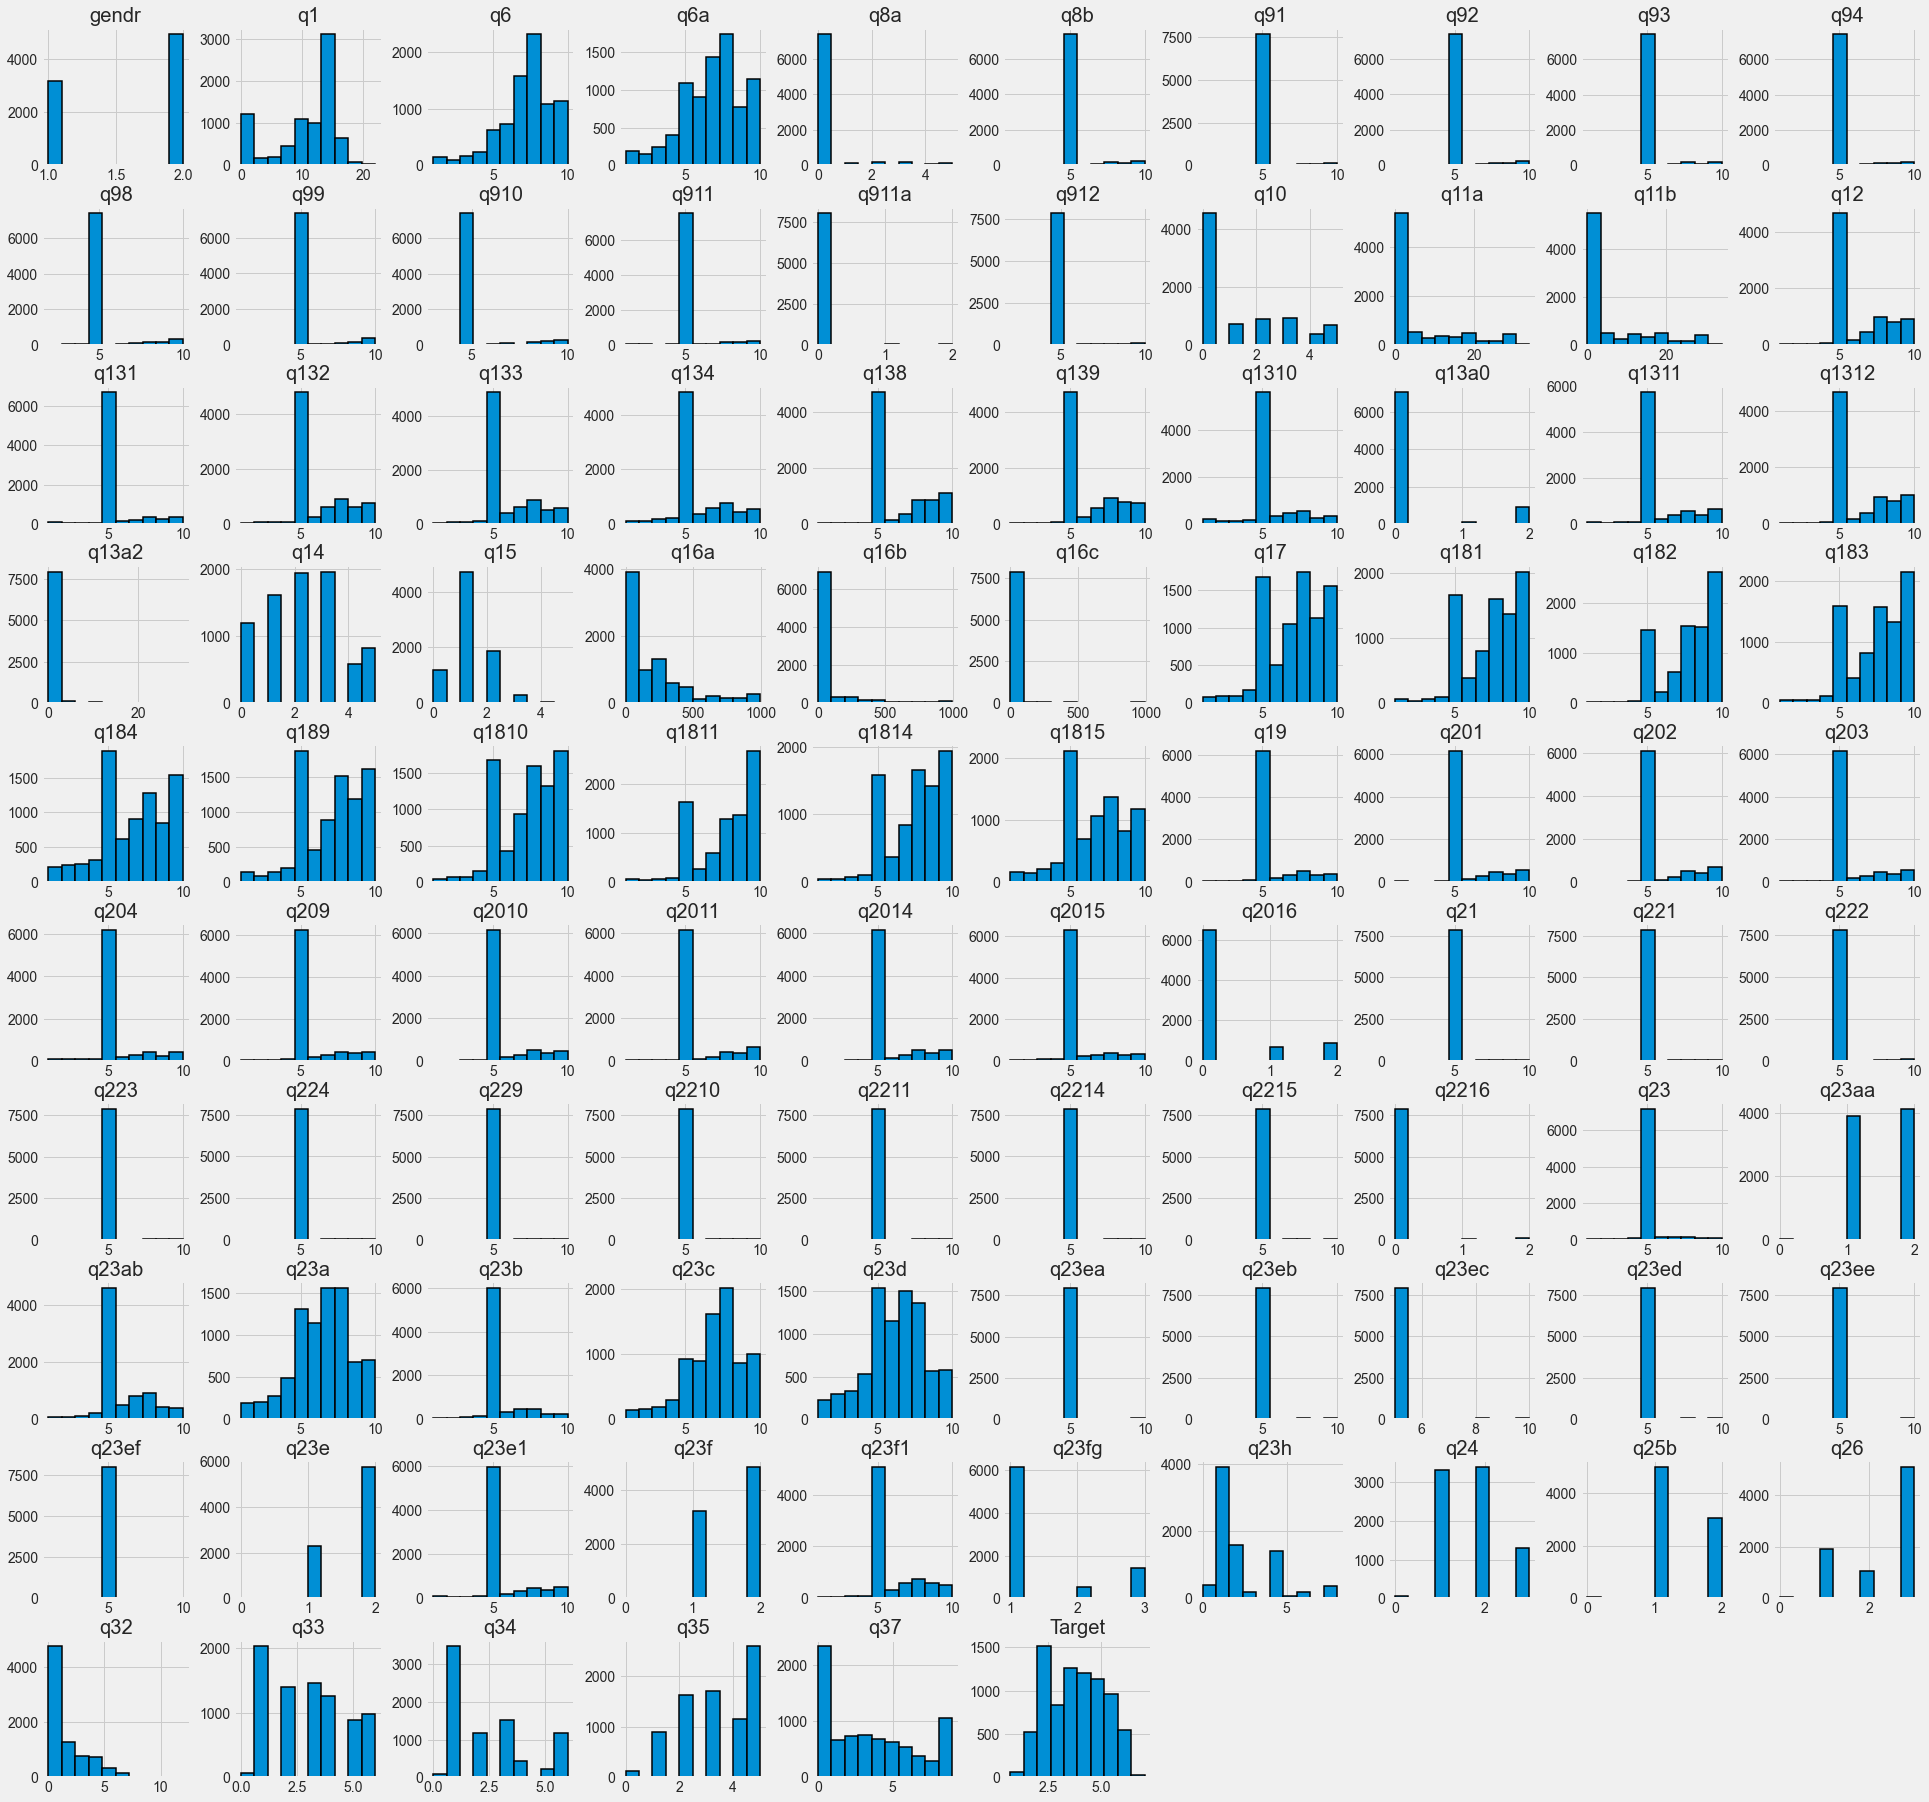

In [31]:
train_df.iloc[:,:].hist(edgecolor="black", linewidth=1.5, figsize=(30, 30));

##### As you can see, most of the features had nan values that were changed with a neutral value for analytical purposes.

In [32]:
# Code to plot co-relation plots
# import seaborn as sns
# plt.figure(figsize=(100, 100))
# sns.heatmap(train_df.corr(), annot=True, cmap=plt.cm.Blues)
# plt.show()

### Preprocessing and transformations

##### I looked at the q23fg feature and discovered that the ordinal value for 3 should be smaller than 1. So I set it to zero.

In [33]:
data.loc[data['q23fg'] == 3., 'q23fg'] = 0

In [34]:
data['q23fg'].unique()

array([2., 1., 0.])

In [35]:
binary_features= ['gendr']
categorical_features = ['q1', 'q8a', 'q911a', 'q10', 'q11a', 'q11b', 'q13a0', 'q13a2', 'q14', 'q16a', 'q16b', 'q16c','q2016','q2216', 'q23aa',
                      'q23e', 'q23f', 'q23h', 'q25b', 'q26', 'q33', 'q34', 'q35', 'q37' ]
numerical_features= ['q15','q24','q32']
target = 'Target'
passthrough_feats = list(set(train_df.columns)- set(binary_features)-set(categorical_features)-set(numerical_features)-set([target]))

In [36]:
preprocessor_all = make_column_transformer(
    (OneHotEncoder(drop="if_binary", dtype="int"),binary_features),
    (StandardScaler(), numerical_features),
    (OneHotEncoder(handle_unknown="ignore", dtype="int"), categorical_features),
    ("passthrough", passthrough_feats)
) 

- StandardScalar is used to all numeric features to convert them to standardised scales because they are in different units. 
- After running an EDA, used OneHotEncoding to the category and binary characteristics we chose. 
- Ordinal features are passed as is, as they are already encoded in an ordinal manner.

In [37]:
X_train, y_train = train_df.drop(columns=[target]), train_df[target]
X_test, y_test = test_df.drop(columns=[target]), test_df[target]

In [38]:
preprocessor_all.fit(X_train)

ColumnTransformer(transformers=[('onehotencoder-1',
                                 OneHotEncoder(drop='if_binary', dtype='int'),
                                 ['gendr']),
                                ('standardscaler', StandardScaler(),
                                 ['q15', 'q24', 'q32']),
                                ('onehotencoder-2',
                                 OneHotEncoder(dtype='int',
                                               handle_unknown='ignore'),
                                 ['q1', 'q8a', 'q911a', 'q10', 'q11a', 'q11b',
                                  'q13a0', 'q13a2', 'q14', 'q16a', 'q16b',
                                  'q16c', 'q2016', 'q2216', 'q23aa', 'q23e',
                                  'q23f', 'q23h', 'q25b', 'q26', 'q33', 'q34',
                                  'q35', 'q37']),
                                ('passthrough', 'passthrough',
                                 ['q91', 'q2011', 'q23b', 'q2010', 'q221',
               

### Baseline Model

In [39]:
from sklearn.metrics import make_scorer


def mape(true, pred):
    return 100.0 * np.mean(np.abs((pred - true) / true))


# make a scorer function that we can pass into cross-validation
mape_scorer = make_scorer(mape, greater_is_better=False)

scoring_metrics = {
    "neg RMSE": "neg_root_mean_squared_error",
    "r2": "r2",
    "mape": mape_scorer,
}

- Root Mean Squared Error is the square root of Mean Squared error. It measures the standard deviation of residuals.
- The coefficient of determination or R-squared represents the proportion of the variance in the dependent variable which is explained by the model. It is a scale-free score i.e. irrespective of the values being small or large, the value of R square will be less than one.
- The mean absolute percentage error (MAPE) is a measure of how accurate a forecast system is. It measures this accuracy as a percentage, and can be calculated as the average absolute percent error for each time period minus actual values divided by actual values.

In [40]:
results = {}

In [41]:
def mean_std_cross_val_scores(model, X_train, y_train, **kwargs):
    """
    Returns mean and std of cross validation

    Parameters
    ----------
    model :
        scikit-learn model
    X_train : numpy array or pandas DataFrame
        X in the training data
    y_train :
        y in the training data

    Returns
    ----------
        pandas Series with mean scores from cross_validation
    """

    scores = cross_validate(model, X_train, y_train, **kwargs)

    mean_scores = pd.DataFrame(scores).mean()
    std_scores = pd.DataFrame(scores).std()
    out_col = []

    for i in range(len(mean_scores)):
        out_col.append((f"%0.3f (+/- %0.3f)" % (mean_scores[i], std_scores[i])))

    return pd.Series(data=out_col, index=mean_scores.index)

In [42]:
results["Dummy"] = mean_std_cross_val_scores(
    DummyRegressor(), X_train, y_train, return_train_score=True, scoring=scoring_metrics
)
pd.DataFrame(results).T

,fit_time,score_time,test_neg RMSE,train_neg RMSE,test_r2,train_r2,test_mape,train_mape
Dummy,0.003 (+/- 0.001),0.001 (+/- 0.000),-1.325 (+/- 0.018),-1.325 (+/- 0.004),-0.001 (+/- 0.001),0.000 (+/- 0.000),-37.553 (+/- 0.652),-37.548 (+/- 0.142)


### Linear Model

In [43]:
pipe_ridge = make_pipeline(
    preprocessor_all, Ridge(max_iter =2000,random_state=123)
)
results["Ridge"] = mean_std_cross_val_scores(
    pipe_ridge,X_train, y_train, return_train_score=True, scoring=scoring_metrics,n_jobs=-1
)
pd.DataFrame(results).T


,fit_time,score_time,test_neg RMSE,train_neg RMSE,test_r2,train_r2,test_mape,train_mape
Dummy,0.003 (+/- 0.001),0.001 (+/- 0.000),-1.325 (+/- 0.018),-1.325 (+/- 0.004),-0.001 (+/- 0.001),0.000 (+/- 0.000),-37.553 (+/- 0.652),-37.548 (+/- 0.142)
Ridge,3.072 (+/- 0.005),0.070 (+/- 0.007),-1.234 (+/- 0.015),-1.130 (+/- 0.004),0.131 (+/- 0.033),0.273 (+/- 0.007),-33.406 (+/- 0.869),-30.511 (+/- 0.215)


In [44]:
from sklearn.model_selection import RandomizedSearchCV

param_random = {"ridge__alpha": [0.01,0.1,0.5,0.75,0.8,0.9,1]}

random_search = RandomizedSearchCV(
    pipe_ridge, param_distributions=param_random, n_jobs=-1,random_state =123,scoring = "r2", n_iter =20
)
random_search.fit(X_train, y_train)

print("Best Hyper-Parameters are:", random_search.best_params_)

/opt/miniconda3/envs/571/lib/python3.9/site-packages/sklearn/model_selection/_search.py:292: UserWarning: The total space of parameters 7 is smaller than n_iter=20. Running 7 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best Hyper-Parameters are: {'ridge__alpha': 1}


In [45]:
print("Best Score is:", random_search.best_score_)

Best Score is: 0.130807063839026


- Ridge is a simple linear model that fits quickly and produces accurate results. 
- As can be observed from the scores, ridge does not do well on our data because it does not appear to follow a linear trend. 
- Ridge is performing better than the dummy. 
- The best reported alpha after hyper parameter optimization is 1 and the best r2 score is 0.1307, which is the same as the default model.

### Tree Based and Boosting based models

In [46]:
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from lightgbm.sklearn import LGBMRegressor


pipe_rf = make_pipeline(preprocessor_all, RandomForestRegressor(random_state=123))

pipe_xgb = make_pipeline(
    preprocessor_all, XGBRegressor(random_state=123, eval_metric = "logloss",verbosity=0)
)
pipe_lgbm = make_pipeline(preprocessor_all, LGBMRegressor(random_state=123))
pipe_catboost = make_pipeline(
    preprocessor_all, CatBoostRegressor(random_state=123, verbose = 0)
)
models = {
    "random forest": pipe_rf,
    "XGBoost": pipe_xgb,
    "LightGBM": pipe_lgbm,
    "CatBoost": pipe_catboost,
}

In [47]:
for (name, model) in models.items():
    results[name] = mean_std_cross_val_scores(
        model, X_train, y_train, return_train_score=True, n_jobs= -1, scoring = scoring_metrics
    )
pd.DataFrame(results).T

,fit_time,score_time,test_neg RMSE,train_neg RMSE,test_r2,train_r2,test_mape,train_mape
Dummy,0.003 (+/- 0.001),0.001 (+/- 0.000),-1.325 (+/- 0.018),-1.325 (+/- 0.004),-0.001 (+/- 0.001),0.000 (+/- 0.000),-37.553 (+/- 0.652),-37.548 (+/- 0.142)
Ridge,3.072 (+/- 0.005),0.070 (+/- 0.007),-1.234 (+/- 0.015),-1.130 (+/- 0.004),0.131 (+/- 0.033),0.273 (+/- 0.007),-33.406 (+/- 0.869),-30.511 (+/- 0.215)
random forest,163.049 (+/- 1.809),0.842 (+/- 0.154),-1.209 (+/- 0.013),-0.451 (+/- 0.002),0.166 (+/- 0.025),0.884 (+/- 0.002),-32.736 (+/- 0.689),-12.078 (+/- 0.059)
XGBoost,8.465 (+/- 0.156),0.052 (+/- 0.009),-1.236 (+/- 0.009),-0.755 (+/- 0.015),0.129 (+/- 0.015),0.675 (+/- 0.012),-32.814 (+/- 0.591),-19.069 (+/- 0.400)
LightGBM,2.158 (+/- 1.525),0.044 (+/- 0.012),-1.198 (+/- 0.013),-0.903 (+/- 0.003),0.182 (+/- 0.015),0.536 (+/- 0.005),-32.310 (+/- 0.739),-24.186 (+/- 0.142)
CatBoost,12.529 (+/- 0.154),0.161 (+/- 0.049),-1.195 (+/- 0.014),-0.868 (+/- 0.004),0.186 (+/- 0.018),0.570 (+/- 0.003),-32.298 (+/- 0.832),-23.207 (+/- 0.122)


- Tree-based and boosting-based models outperform the dummy and the ridge(linear) model 

- The CatBoost model has the best test r2 of 0.189. 

##### Overfitting/Underfitting:

- Because the difference between the train and test scores is so large, the Random forests model overfits.
- All other models seem to be performing fine on the data.

##### Fit time:

- The Random forest takes the longest to fit because the maximum depth isn't specified and the model overfits the data. 
- LGBM has the lowest fit time compared to all other models.

##### Score time:

- Random forests has the highest score time. 
- LGBM has the lowest score time compared to all other models.

### Feature Selection- Lasso- L1 Regularization

In [48]:
from sklearn.linear_model import Lasso, LassoCV
from sklearn.feature_selection import SelectFromModel

pipe_cat_las = make_pipeline(preprocessor_all, SelectFromModel(Lasso(alpha=0.01, max_iter=100000)),CatBoostRegressor(verbose=0, random_state=123))

res = mean_std_cross_val_scores(pipe_cat_las,X_train, y_train,scoring=scoring_metrics,return_train_score=True)
res

fit_time            3.934 (+/- 1.308)
score_time          0.060 (+/- 0.037)
test_neg RMSE      -1.205 (+/- 0.019)
train_neg RMSE     -0.813 (+/- 0.016)
test_r2             0.173 (+/- 0.019)
train_r2            0.624 (+/- 0.014)
test_mape         -32.385 (+/- 0.769)
train_mape        -21.037 (+/- 0.440)
dtype: object

- Since the test R2 score has reduced using the feature selection. Its not a good idea to include the given feature selection.

### Hyper-parameter optimization

In [49]:
params = {
    "random forest": {'randomforestregressor__max_depth': [10,20]},
    "XGBoost": {'xgbregressor__max_depth' : [10, 20]},
    "CatBoost": {'catboostregressor__max_depth' : [10, 20]} }
models = {
    "random forest": pipe_rf,
    "XGBoost": pipe_xgb,
    "CatBoost": pipe_catboost,
}

for (name, model) in models.items():
    print("Running hyperparameter optimization for",name)
    random_search = RandomizedSearchCV(model, param_distributions=params[name], n_jobs=-1,random_state =123,scoring = "r2",n_iter= 3)
    random_search.fit(X_train,y_train)
    print("Best Hyper-Parameters are", random_search.best_params_)
    print("Best Score", random_search.best_score_)

Running hyperparameter optimization for random forest


/opt/miniconda3/envs/571/lib/python3.9/site-packages/sklearn/model_selection/_search.py:292: UserWarning: The total space of parameters 2 is smaller than n_iter=3. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best Hyper-Parameters are {'randomforestregressor__max_depth': 10}
Best Score 0.1764583133075977
Running hyperparameter optimization for XGBoost


/opt/miniconda3/envs/571/lib/python3.9/site-packages/sklearn/model_selection/_search.py:292: UserWarning: The total space of parameters 2 is smaller than n_iter=3. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best Hyper-Parameters are {'xgbregressor__max_depth': 10}
Best Score 0.06960731571283127
Running hyperparameter optimization for CatBoost


/opt/miniconda3/envs/571/lib/python3.9/site-packages/sklearn/model_selection/_search.py:292: UserWarning: The total space of parameters 2 is smaller than n_iter=3. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/opt/miniconda3/envs/571/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
5 fits failed out of a total of 10.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/miniconda3/envs/571/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/miniconda3/envs/571/lib/python3.9

Best Hyper-Parameters are {'catboostregressor__max_depth': 10}
Best Score 0.1873608209370368


- The r2 scores have decreased as a result of the above hyper parameter optimization tests, yielding no noteworthy results.

### Interpretation and feature importances

In [50]:
import shap

In [51]:
pipe_catboost_opti = make_pipeline(
    preprocessor_all, CatBoostRegressor(random_state=123, verbose = 0))

In [52]:
pipe_catboost_opti.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('onehotencoder-1',
                                                  OneHotEncoder(drop='if_binary',
                                                                dtype='int'),
                                                  ['gendr']),
                                                 ('standardscaler',
                                                  StandardScaler(),
                                                  ['q15', 'q24', 'q32']),
                                                 ('onehotencoder-2',
                                                  OneHotEncoder(dtype='int',
                                                                handle_unknown='ignore'),
                                                  ['q1', 'q8a', 'q911a', 'q10',
                                                   'q11a', 'q11b', 'q13a0',
                                                   'q13a2', 'q14', 'q

In [53]:
standard_scalar_names= pipe_catboost_opti.named_steps['columntransformer'].named_transformers_['standardscaler'].get_feature_names_out().tolist()
onehot_names= pipe_catboost_opti.named_steps['columntransformer'].named_transformers_['onehotencoder-2'].get_feature_names_out().tolist()

feature_names = binary_features+standard_scalar_names + onehot_names+ passthrough_feats

In [54]:
X_train_enc = pd.DataFrame(
    data=preprocessor_all.transform(X_train).toarray(),
    columns=feature_names,
    index=X_train.index,
)
X_train_enc.head()

,gendr,q15,q24,q32,q1_0,q1_1,q1_2,q1_3,q1_4,q1_5,...,q23e1,q21,q182,q23eb,q23ef,q1810,q23,q223,q138,q23ee
5440,1.0,1.172089,1.730809,-0.816227,0.0,0.0,0.0,0.0,0.0,0.0,...,5.0,5.0,10.0,5.0,5.0,10.0,5.0,5.0,5.0,5.0
8832,1.0,-0.220973,-1.006379,-0.816227,0.0,0.0,0.0,0.0,0.0,0.0,...,10.0,5.0,10.0,5.0,5.0,7.0,5.0,5.0,5.0,5.0
6929,1.0,1.172089,0.362215,-0.816227,0.0,0.0,0.0,0.0,0.0,0.0,...,8.0,5.0,9.0,5.0,5.0,8.0,5.0,5.0,7.0,5.0
8199,0.0,-1.614035,1.730809,-0.816227,0.0,0.0,0.0,0.0,0.0,0.0,...,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,9.0,5.0
5442,1.0,-0.220973,0.362215,-0.816227,0.0,0.0,1.0,0.0,0.0,0.0,...,5.0,5.0,8.0,5.0,5.0,8.0,5.0,5.0,6.0,5.0


In [55]:
X_test_enc = pd.DataFrame(
    data=preprocessor_all.transform(X_test).toarray(),
    columns=feature_names,
    index=X_test.index,
)
X_test_enc.head()

,gendr,q15,q24,q32,q1_0,q1_1,q1_2,q1_3,q1_4,q1_5,...,q23e1,q21,q182,q23eb,q23ef,q1810,q23,q223,q138,q23ee
221,0.0,-1.614035,1.730809,0.882215,0.0,0.0,0.0,0.0,0.0,0.0,...,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,3.0,5.0
7279,1.0,-0.220973,-1.006379,-0.816227,0.0,0.0,0.0,0.0,0.0,0.0,...,10.0,5.0,8.0,5.0,5.0,8.0,5.0,5.0,5.0,5.0
8415,0.0,-0.220973,-1.006379,-0.816227,0.0,0.0,0.0,0.0,0.0,0.0,...,5.0,5.0,4.0,5.0,5.0,6.0,5.0,5.0,5.0,5.0
7202,0.0,-0.220973,0.362215,-0.816227,0.0,0.0,0.0,0.0,0.0,0.0,...,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0
759,1.0,-0.220973,0.362215,1.448362,0.0,0.0,0.0,0.0,0.0,0.0,...,10.0,5.0,8.0,5.0,5.0,10.0,8.0,5.0,8.0,5.0


In [56]:
cat_explainer = shap.TreeExplainer(pipe_catboost_opti.named_steps["catboostregressor"])
train_cat_shap_values = cat_explainer.shap_values(X_train_enc)

In [57]:
shap.initjs()

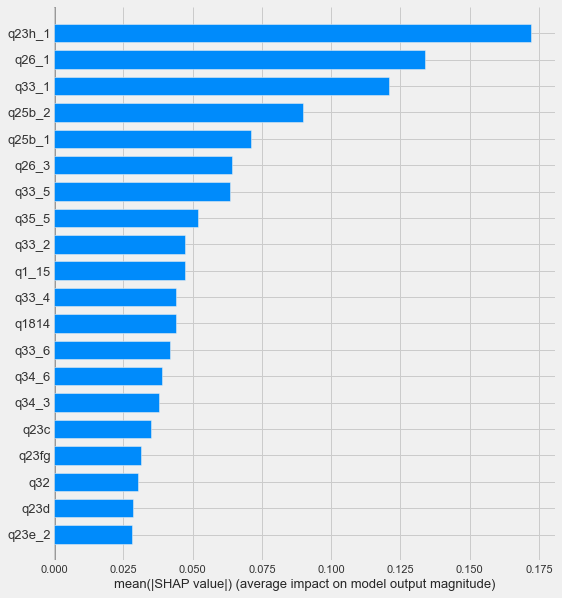

In [58]:
shap.summary_plot(train_cat_shap_values, X_train_enc, plot_type="bar")

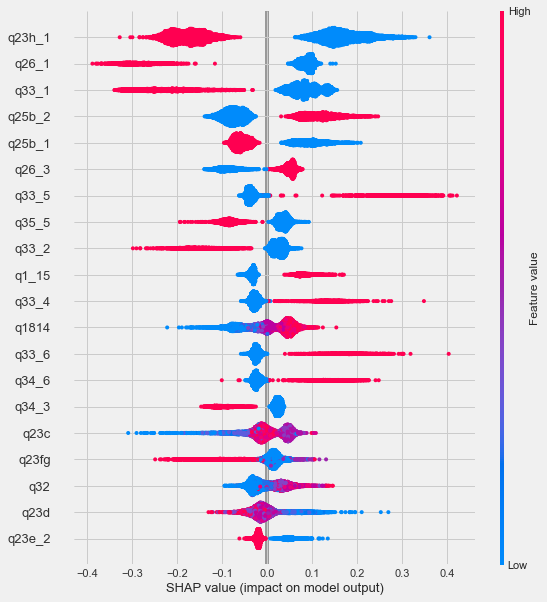

In [59]:
shap.summary_plot(train_cat_shap_values, X_train_enc)

Plot1: 

The average SHAP value for each feature is shown in plot 1, or the first plot. The feature 'q23h' with value 1, i.e. the use of cash as a payment method, has the biggest impact on the predictions, according to the plot, while the feature 'q26' with value 1, i.e. the feature representing new consumers, has the second highest impact. 

Plot2: 

Plot 2 depicts the importance of each feature as well as the direction in which that feature influences the prediction.

Top 5 interpretations from both the plots:
1) Customers are more loyal since they use less cash as a mode of payment. 
2) The loyalty score of new customers is lower. 
3) Customers who are older are more loyal. 
4) People without access to personal transportation or who do not possess a car are more loyal. 
5) Compared to six months ago, customers who are riding transit about the same are more loyal.

### Result on the test set

In [60]:
print ("R2 Score:",pipe_catboost_opti.score(X_test, y_test))

R2 Score: 0.21026136515872562


In [61]:
from sklearn.metrics import mean_squared_error
preds = pipe_catboost_opti.predict(X_test)
print ("RMSE Score:",mean_squared_error(y_test, preds))
print ("Mape Score:",mape(y_test, preds))

RMSE Score: 1.3593312064812169
Mape Score: 31.042889962173316


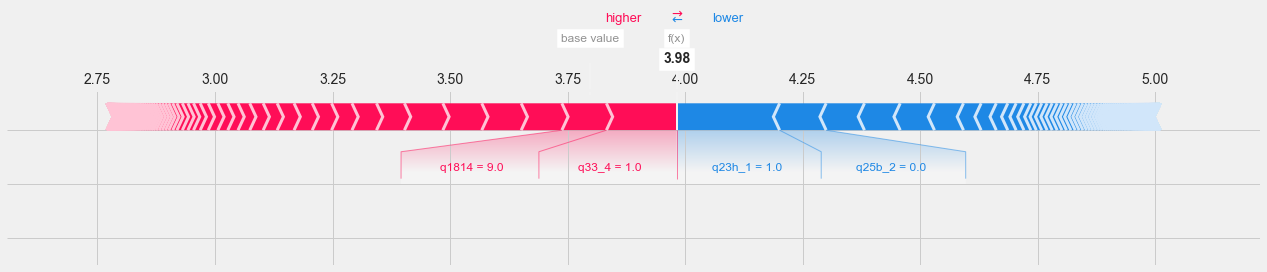

In [62]:
X_train_enc = X_train_enc.round(3)
X_test_enc = X_test_enc.round(3)

test_cat_shap_values = cat_explainer.shap_values(X_test_enc[:100])

shap.force_plot(
    cat_explainer.expected_value,
    test_cat_shap_values[2],
    X_test_enc.iloc[2, :],
    matplotlib=True,
)

- As can be observed, the higher value/presence of cash payment drives the prediction in negative direction.
- The lack of access to a car or other personal transportation modes drives the prediction in  negative direction.
- Being in the 45-54 age group drives the forecast in a favourable direction, implying that older customers are more loyal.

### Summary of results

In [63]:
from tabulate import tabulate
head= ['Model','Type','Dataset','Test R2 score','Test mape','Remarks']

data= [('Dummy Regressor','Non-linear','Train','0.001','37.55','Baseline'),
      ('Ridge','Linear','Train','0.131','33.40','Liner/simple model, less fit time ,low r2'),
      ('Random Forest Regressor','Non-linear','Train','0.165','32.75','Low mape score, Overfitting, high fit time'),
      ('XGBoost Regressor','Non-linear','Train','0.129', '32.81', 'High mape score, low r2'),
      ('LGBM Regressor','Non-linear','Train','0.182','32.31','Less fit time, low r2 '),
      ('CatBoost Regressor','Non-linear','Train','0.189','32.23','Best individual model,significant fit time')]

print(tabulate(data,headers= head,tablefmt= "grid"))

+-------------------------+------------+-----------+-----------------+-------------+--------------------------------------------+
| Model                   | Type       | Dataset   |   Test R2 score |   Test mape | Remarks                                    |
+=========================+============+===========+=================+=============+============================================+
| Dummy Regressor         | Non-linear | Train     |           0.001 |       37.55 | Baseline                                   |
+-------------------------+------------+-----------+-----------------+-------------+--------------------------------------------+
| Ridge                   | Linear     | Train     |           0.131 |       33.4  | Liner/simple model, less fit time ,low r2  |
+-------------------------+------------+-----------+-----------------+-------------+--------------------------------------------+
| Random Forest Regressor | Non-linear | Train     |           0.165 |       32.75 | Low m

Using the survey data from Translink  , started with the problem statement of predicting a loyalty score for the data points.

Performed the given steps.

1) Data cleaning: According to my understanding, the data was changed or enhanced. Features with no questions and those that were unrelated were removed. Unrealistic target data was removed.

2) EDA: Obtaining the connection between features and determining which features should be engineered and preprocessed in which manner.

3) Loyalty Metric : Created a new loyalty metric based on 4 other features from the dataset.

4) Preprocessing: Preprocessed our features according to their kind and what was learned from the EDA.

5) Different Models: Tried out different regression models on the train data i.e. The Baseline, Linear and Non Linear Models.Compared them based on scores, fit and score time and Underfit or Overfit. Got the Best model as CatBoost based on the scores.

6) Feature Selection: Using lasso and select from Model, tried feature selection and looked for improvements in cross val scores. There was no use in considering feature selection because there was no improvement.

7) Hyper parameter optimization: On the non-linear models ,performed Hyper parameter optimization and checked for improvements in scores.

8) Interpretation and feature importances: Implemented shap on our best model i.e. CatBoost to gain insights as to which features have major impact on our prediction and which direction they drive the predictions to. From the given step we are able to infer the feature 'q23h' with value 1, i.e. the use of cash as a payment method, has the biggest impact on the predictions, while the feature 'q26' with value 1, i.e. the feature representing new consumers, has the second highest impact.

9) Test data Evaluation: We used test data to evaluate our trained best model and presented the results as well as our knowledge of the predictions.



### Executive Summary:

- The features 'q23h' with value 1, i.e. the usage of cash as a payment method, and 'q26' with value 1, i.e. the feature indicating new customers, are important in predicting a customer's loyalty. 
- Translink can use these characteristics to anticipate a customer's loyalty in advance. 
- Also, use these features to provide a better user experience and focus on a certain user group. 
- Alternatively, improve the experience for the users who were left out.

#### Future enhancements:

- May have attempted stacking or averaging the regressors to improve the scores. 

- The data may have been changed to incorporate polynomial features in order to create a linear model. 

- A better feature selection method can also be utilised.

### Thank you